In [1]:
import tensorflow as tf
tf.__version__

'2.10.1'

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [3]:
pd.read_xml('../Semi_Data/annotations/BikesHelmets0.xml')

,folder,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,bndbox
0,images,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN
1,None,BikesHelmets0.png,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN
2,None,None,400.0,267.0,3.0,NaN,None,None,NaN,NaN,NaN,NaN
3,None,None,NaN,NaN,NaN,0.0,None,None,NaN,NaN,NaN,NaN
4,None,None,NaN,NaN,NaN,NaN,With Helmet,Unspecified,0.0,0.0,0.0,NaN
5,None,None,NaN,NaN,NaN,NaN,With Helmet,Unspecified,0.0,0.0,0.0,NaN
6,None,None,NaN,NaN,NaN,NaN,With Helmet,Unspecified,0.0,0.0,0.0,NaN
7,None,None,NaN,NaN,NaN,NaN,With Helmet,Unspecified,0.0,0.0,0.0,NaN


In [7]:
pip install xmltodict

  Using cached xmltodict-0.13.0-py2.py3-none-any.whl (10.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
# import json
# import xmltodict

# ## xml 파일을 json 파일로 변환

# for i in range(766) :
#     try :
#         with open(f"../Semi_Data/annotations/BikesHelmets{i}.xml",'r') as f:
#             xmlString = f.read()
            
#         jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)
        
#         with open(f"../Semi_Data/annotation/BikesHelmets{i}.json", 'w') as f:
#             f.write(jsonString)
#     except :
#         pass

In [10]:
import cv2

# 이미지 로드
image = cv2.imread('../Semi_Data/images/BikesHelmets0.png')
# image.shape
# 이미지 크기 조정
image = cv2.resize(image, (416, 416))

cv2.imwrite('./practice.png', image)
# 픽셀 값 정규화
image = image.astype('float32')/255.0

# YOLO 모델 입력 데이터 형식으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis = 0) # 이미지 배열의 차원을 하나 추가해서 (1, height, width, channels) 형식으로 변환

(267, 400, 3)

In [4]:
image.shape

(1, 416, 416, 3)

False

In [17]:
image

array([[[[0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         ...,
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ]],

        [[0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ]],

        [[0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ],
         [0.9647059 , 0.96862745, 0.972549  ]],

        ...,

        [[0.74509805, 0.78431374, 0.827451  ],
         [0.7490196 , 0.78431374, 0.827451  ]

In [43]:
import cv2
import json

for i in range(766) :
    try :
        # json 파일에서 bndbox 정보 추출
        with open(f'../Semi_Data/annotation/BikesHelmets{i}.json', 'r') as f:
            label = json.load(f)

        bndboxes = []
        for obj in label['annotation']['object']:
            bndbox = obj['bndbox']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            bndboxes.append((xmin, ymin, xmax, ymax))

        # 이미지 로드
        img = cv2.imread(f'../Semi_Data/images/BikesHelmets{i}.png')

        # 경계 상자 그리기
        for bndbox in bndboxes:
            cv2.rectangle(img, (bndbox[0], bndbox[1]), (bndbox[2], bndbox[3]), (0, 255, 0), 2)

        # 이미지 저장
        cv2.imwrite(f'../Semi_Data/bounded_images/BikeHelmets{i}.png', img) # 저장할 경로 입력
    except :
        try :
            with open(f'../Semi_Data/annotation/BikesHelmets{i}.json', 'r') as f:
                label = json.load(f)
            
            bndboxes = []
            bndbox = label['annotation']['object']['bndbox']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            bndboxes.append((xmin, ymin, xmax, ymax))
            
            img = cv2.imread(f'../Semi_Data/images/BikesHelmets{i}.png')

        # 경계 상자 그리기
            for bndbox in bndboxes:
                cv2.rectangle(img, (bndbox[0], bndbox[1]), (bndbox[2], bndbox[3]), (0, 255, 0), 2)

            # 이미지 저장
            cv2.imwrite(f'../Semi_Data/bounded_images/BikeHelmets{i}.png', img) # 저장할 경로 입력
            
        except :
            pass
        


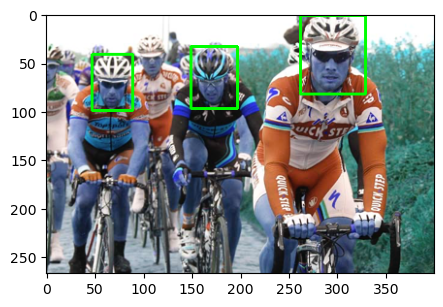

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(img)

In [39]:
with open(f'../Semi_Data/annotation/BikesHelmets1.json', 'r') as f:
    label = json.load(f)

bndboxes = []

bndbox = label['annotation']['object']['bndbox']
xmin = int(bndbox['xmin'])
ymin = int(bndbox['ymin'])
xmax = int(bndbox['xmax'])
ymax = int(bndbox['ymax'])
bndboxes.append((xmin, ymin, xmax, ymax))
bndboxes

[(161, 0, 252, 82)]

In [28]:
obj

'name'

In [39]:
import cv2
import json
idx = 0
label_cnt = 0
img_label = []

for i in range(766) :
    try :
        # json 파일에서 bndbox 정보 추출
        with open(f'../Semi_Data/annotation/BikesHelmets{i}.json', 'r') as f:
            label = json.load(f)

        bndboxes = []
        
        for obj in label['annotation']['object']:
            bndbox = obj['bndbox']
            img_l = obj['name']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            bndboxes.append((xmin, ymin, xmax, ymax, img_l))
            
            
        
        # 이미지 자르기
        for bndbox in bndboxes:
            try :
                # 이미지 로드
                img = cv2.imread(f'../Semi_Data/images/BikesHelmets{i}.png')
                img = img[bndbox[1]:bndbox[3], bndbox[0]:bndbox[2]]
                # 이미지 저장
                cv2.imwrite(f'../Semi_Data/cut_images/BikeHelmets{idx}.png', img) # 저장할 경로 입력
                img_label.append(bndbox[4])
                idx += 1
            
            except :
                pass
            
    except :
        try :
            with open(f'../Semi_Data/annotation/BikesHelmets{i}.json', 'r') as f:
                label = json.load(f)
            
            bndboxes = []
            
            bndbox = label['annotation']['object']['bndbox']
            img_l = label['annotation']['object']['name']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            bndboxes.append((xmin, ymin, xmax, ymax, img_l))
            
            

            # 이미지 자르기
            
            for bndbox in bndboxes:
                try :
                    # 이미지 로드
                    img = cv2.imread(f'../Semi_Data/images/BikesHelmets{i}.png')
                    img = img[bndbox[1]:bndbox[3], bndbox[0]:bndbox[2]]
                
                    # 이미지 저장
                    cv2.imwrite(f'../Semi_Data/cut_images/BikeHelmets{idx}.png', img) # 저장할 경로 입력
                    img_label.append(bndbox[4])
                    idx += 1
                
                except :
                    pass
                
                
        except :
            print(i)
        


35
50
54
459
735


In [40]:
len(img_label)

1434